# Learning from Data Week 8

In [8]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import make_scorer
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Problem 2

In [2]:
# Load data
cols = ["digit", "intensity", "symmetry"]
train = pd.read_table("features.train", header=None, names=cols, sep=r'\s+')
test = pd.read_table("features.test", header=None, names=cols, sep=r'\s+')

In [3]:
train.head()

,digit,intensity,symmetry
0,6,0.341092,-4.528937
1,5,0.444131,-5.496812
2,4,0.231002,-2.886750
3,7,0.200275,-3.534375
4,3,0.291936,-4.352062


In [179]:
# Evaluate "one versus all" models
def one_versus_all(digits, svm):
    # Build model for each digit
    for d in digits:
        labels = train['digit'] == d
        features = train[["intensity", "symmetry"]]            
        svm.fit(features, labels)
        preds = svm.predict(features)
        # Binary classification error
        error = np.mean(labels != preds)
        print ("E_in for {}-versus-all: {}.".format(d, error))
        print ("Number of support vectors: {}.".format(sum(svm.n_support_)))

one_versus_all([0,2,4,6,8], SVC(C=0.01, kernel=b'poly', degree=2, coef0=1))

E_in for 0-versus-all: 0.152105335345.
Number of support vectors: 2389.
E_in for 2-versus-all: 0.100260595254.
Number of support vectors: 1974.
E_in for 4-versus-all: 0.0894253188863.
Number of support vectors: 1887.
E_in for 6-versus-all: 0.0910711836511.
Number of support vectors: 1828.
E_in for 8-versus-all: 0.0743382252092.
Number of support vectors: 1739.


### Problem 3

In [15]:
one_versus_all([1,3,5,7,9], SVC(C=0.01, kernel=b'poly', degree=2, coef0=1))

E_in for 1-versus-all: 0.014812782883.
Number of support vectors: 482.
E_in for 3-versus-all: 0.0902482512687.
Number of support vectors: 1928.
E_in for 5-versus-all: 0.0762584007681.
Number of support vectors: 1575.
E_in for 7-versus-all: 0.0884652311068.
Number of support vectors: 1786.
E_in for 9-versus-all: 0.0883280757098.
Number of support vectors: 2013.


### Problem 4

In [17]:
2389 - 482

1907

### Problem 5

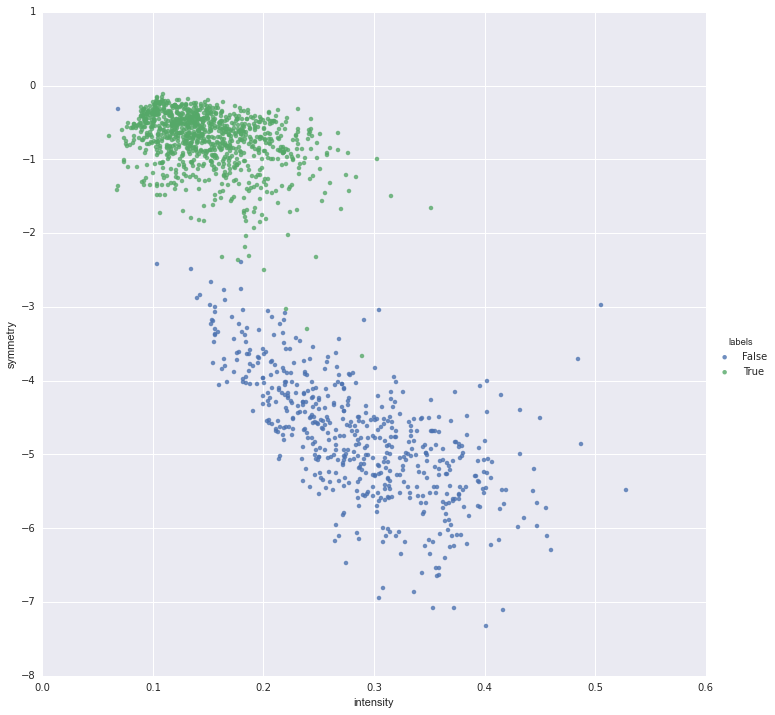

In [19]:
# Plot 1-versus-5 data
def plot_ovo(digit_1, digit_2):
    train_ovo = train[(train['digit']==digit_1) | (train['digit']==digit_2)].reset_index(drop=True)
    train_ovo['labels'] = train_ovo['digit'] == digit_1
    
    sns.lmplot("intensity", "symmetry", data=train_ovo, hue='labels', size=10, fit_reg=False)
    
plot_ovo(1,5)

In [188]:
# Evaluate "one versus one" models
def one_versus_one(digit_1, digit_2, kernel, c_vector, Q=2):
    '''
    SVM one-versus-one classifier
    '''
    # Select examples and features
    train_ovo = train[(train['digit']==digit_1) | (train['digit']==digit_2)]
    test_ovo = test[(test['digit']==digit_1) | (test['digit']==digit_2)]
    train_labels, test_labels = train_ovo['digit'] == digit_1, test_ovo['digit'] == digit_1
    train_features, test_features = train_ovo[["intensity", "symmetry"]], test_ovo[["intensity", "symmetry"]]    
    # Fit different models
    for c in c_vector:    
        svm = SVC(C=c, kernel=kernel, degree=Q, coef0=1)
        svm.fit(train_features, train_labels)
        preds_in, preds_out = svm.predict(train_features), svm.predict(test_features)
        # Report results
        E_in, E_out = np.mean(train_labels != preds_in), np.mean(test_labels != preds_out)
        print ("C: {}".format(c))
        print ("\tE_in for {}-versus-{}: {}.".format(digit_1, digit_2, E_in))
        print ("\tE_out for {}-versus-{}: {}.".format(digit_1, digit_2, E_out))
        print ("\tNumber of support vectors: {}.".format(sum(svm.n_support_)))        

one_versus_one(1, 5, b'poly', [0.0001, 0.001, 0.01, 0.1, 1], 2)

C: 0.0001
	E_in for 1-versus-5: 0.0185778347213.
	E_out for 1-versus-5: 0.0283018867925.
	Number of support vectors: 478.
C: 0.001
	E_in for 1-versus-5: 0.00640614990391.
	E_out for 1-versus-5: 0.0188679245283.
	Number of support vectors: 142.
C: 0.01
	E_in for 1-versus-5: 0.00448430493274.
	E_out for 1-versus-5: 0.0188679245283.
	Number of support vectors: 52.
C: 0.1
	E_in for 1-versus-5: 0.00448430493274.
	E_out for 1-versus-5: 0.0212264150943.
	Number of support vectors: 28.
C: 1
	E_in for 1-versus-5: 0.00384368994234.
	E_out for 1-versus-5: 0.0188679245283.
	Number of support vectors: 24.


### Problem 6

In [40]:
# Q = 5
one_versus_one(1, 5, [0.0001, 0.001, 0.01, 0.1, 1], 5)

C: 0.0001
	E_in for 1-versus-5: 0.00512491992313.
	E_out for 1-versus-5: 0.0165094339623.
	Number of support vectors: 34.
C: 0.001
	E_in for 1-versus-5: 0.00448430493274.
	E_out for 1-versus-5: 0.0188679245283.
	Number of support vectors: 26.
C: 0.01
	E_in for 1-versus-5: 0.00384368994234.
	E_out for 1-versus-5: 0.0235849056604.
	Number of support vectors: 25.
C: 0.1
	E_in for 1-versus-5: 0.00384368994234.
	E_out for 1-versus-5: 0.0212264150943.
	Number of support vectors: 23.
C: 1
	E_in for 1-versus-5: 0.00320307495195.
	E_out for 1-versus-5: 0.0188679245283.
	Number of support vectors: 26.


### Problem 7

In [173]:
# Evaluate "one versus one" models
def ovo_CV(digit_1, digit_2, c_vector, Q, runs):
    '''
    SVM one-versus-one classifier with CV
    '''
    # Select examples and features
    train_ovo = train[(train['digit']==digit_1) | (train['digit']==digit_2)].reset_index(drop=True)
    labels = train_ovo['digit'] == digit_1
    features = train_ovo[["intensity", "symmetry"]]
    np.random.seed(0)
        
    # Do multiple runs
    best_c = []
    for run in range(runs):
        # 10-folder cross validation
        kf = KFold(len(train_ovo), n_folds=10, shuffle=True)        
        # Store E_cv for all c's
        E_cv_all = []
        for c in c_vector:
            # Store E_val for each run
            E_val_vector = []
            for train_index, val_index in kf:
                X_train, X_val = train_ovo.ix[train_index], train_ovo.ix[val_index]
                y_train, y_val = labels[train_index], labels[val_index]
                # Fit model
                svm = SVC(C=c, kernel=b'poly', degree=Q, coef0=1)
                svm.fit(X_train, y_train)
                preds_val = svm.predict(X_val)
                # Report results
                E_val = np.mean(y_val != preds_val)
                E_val_vector.append(E_val)
            # Compute E_cv for 10-folds, for a particular c
            E_cv = np.mean(E_val_vector)
            # Construct vector with E_cv for all c's
            E_cv_all.append(E_cv)
        best_c.append(np.argmin(E_cv_all))
    # Find best parameter c
    optimum_c = c_vector[Counter(best_c).most_common(1)[0][0]]
    print (optimum_c)

ovo_CV(1, 5, [0.0001, 0.001, 0.01, 0.1, 1], 2, 10)

0.001


### Problem 7 with sklearn function

In [148]:
# Evaluate "one versus one" models
def ovo_CV_sk(digit_1, digit_2, c_vector, Q, runs):
    '''
    SVM one-versus-one classifier with CV
    '''
    # Select examples and features
    train_ovo = train[(train['digit']==digit_1) | (train['digit']==digit_2)].reset_index(drop=True)
    labels = train_ovo['digit'] == digit_1
    features = train_ovo[["intensity", "symmetry"]]
    np.random.seed(0)
    # Make scorer
    binary_error = make_scorer((lambda y, y_preds: np.mean(y != y_preds)))
    
    # Do multiple runs
    best_c = []
    for run in range(runs):
        # 10-folder cross validation
        kf = KFold(len(train_ovo), n_folds=10, shuffle=True)
        # Store E_cv for all c's
        E_cv_all = []
        for c in c_vector:                    
            # Select model
            svm = SVC(C=c, kernel=b'poly', degree=Q, coef0=1)
            E_val_vector = cross_val_score(svm, X=train_ovo, y=labels, scoring=binary_error, cv=kf)
            # Compute E_cv for 10-folds, for a particular c
            E_cv = np.mean(E_val_vector)
            # Construct vector with E_cv for all c's
            E_cv_all.append(E_cv)
        best_c.append(np.argmin(E_cv_all))
    # Find best parameter c
    optimum_c = c_vector[Counter(best_c).most_common(1)[0][0]]
    print (optimum_c)

ovo_CV_sk(1, 5, [0.0001, 0.001, 0.01, 0.1, 1], 2, 10)

0.001


### Problem 8

In [150]:
def problem_8(digit_1, digit_2, c, Q, runs):
    '''
    SVM one-versus-one classifier with CV
    '''
    # Select examples and features
    train_ovo = train[(train['digit']==digit_1) | (train['digit']==digit_2)].reset_index(drop=True)
    labels = train_ovo['digit'] == digit_1
    features = train_ovo[["intensity", "symmetry"]]
    np.random.seed(0)
    # Make scorer
    binary_error = make_scorer((lambda y, y_preds: np.mean(y != y_preds)))
    
    # Do multiple runs
    E_cv_all = []
    for run in range(runs):
        # 10-folder cross validation
        kf = KFold(len(train_ovo), n_folds=10, shuffle=True)
        # Select model
        svm = SVC(C=c, kernel=b'poly', degree=Q, coef0=1)
        E_val_vector = cross_val_score(svm, X=train_ovo, y=labels, scoring=binary_error, cv=kf)
        # Compute E_cv
        E_cv_all.append(np.mean(E_val_vector))
    print (np.mean(E_cv_all))

problem_8(1, 5, 0.001, 2, 100)

0.0


### Problem 9

In [189]:
# RBF kernel
one_versus_one(1, 5, b'rbf', [0.01,1,100,1e4,10e6])

C: 0.01
	E_in for 1-versus-5: 0.00384368994234.
	E_out for 1-versus-5: 0.0212264150943.
	Number of support vectors: 347.
C: 1
	E_in for 1-versus-5: 0.00448430493274.
	E_out for 1-versus-5: 0.0212264150943.
	Number of support vectors: 30.
C: 100
	E_in for 1-versus-5: 0.00320307495195.
	E_out for 1-versus-5: 0.0188679245283.
	Number of support vectors: 20.
C: 10000.0
	E_in for 1-versus-5: 0.00256245996156.
	E_out for 1-versus-5: 0.0188679245283.
	Number of support vectors: 17.
C: 10000000.0
	E_in for 1-versus-5: 0.00128122998078.
	E_out for 1-versus-5: 0.0235849056604.
	Number of support vectors: 16.
